In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [22]:
# Load the MNIST dataset and split into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to be compatible with CNN input (add channel dimension)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the CNN architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(320, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 320)               2949440   
                                                                 
 dense_3 (Dense)             (None, 50)                16050     
                                                      

In [23]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.1190 - accuracy: 0.9631 - val_loss: 0.0523 - val_accuracy: 0.9852
Epoch 2/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.0387 - accuracy: 0.9876 - val_loss: 0.0412 - val_accuracy: 0.9897
Epoch 3/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.0235 - accuracy: 0.9929 - val_loss: 0.0488 - val_accuracy: 0.9872
Epoch 4/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.0353 - val_accuracy: 0.9912
Epoch 5/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.0517 - val_accuracy: 0.9878
Epoch 6/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0443 - val_accuracy: 0.9898
Epoch 7/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0406 -

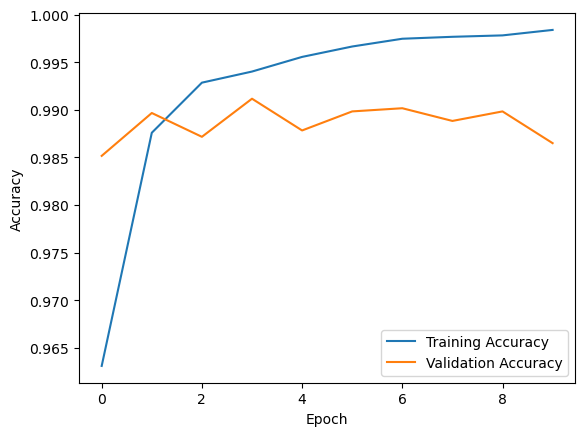

In [24]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9836000204086304


In [26]:
# Save the trained model
model.save("mnist_cnn_model.h5")

In [27]:
# Testing new image on the trained model

import cv2

# Load the trained model
model = tf.keras.models.load_model("mnist_cnn_model.h5")

# Function to preprocess the test image
def preprocess_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 28x28 (same size as MNIST digits)
    image = cv2.resize(image, (28, 28))

    # Normalize the pixel values to be between 0 and 1
    image = image / 255.0

    # Add a batch dimension to the image
    image = image.reshape(1, 28, 28, 1)

    return image

In [31]:
# Path to your test image (replace with the actual image path)
test_image_path = "five.jpg"

# Preprocess the test image
preprocessed_image = preprocess_image(test_image_path)

# Make predictions on the test image
predictions = model.predict(preprocessed_image)

# Get the predicted label (digit) from the model's output
predicted_label = tf.argmax(predictions, axis=1)[0].numpy()

print("Predicted Label:", predicted_label)

1/1 [==============================] - 0s 12ms/step
Predicted Label: 5
